In [87]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
cwd = os.getcwd()
sns.set()
sns.set_palette("OrRd_r")
sns.set_style("white")
sns.set_style({'grid.color': '0.95'})
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

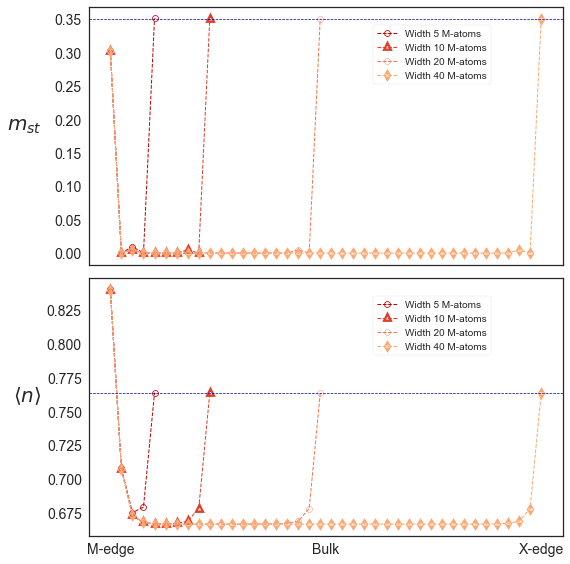

In [97]:
SAVE = True

## PARAMETERS

U = 16
BETA = 20
MU = 15
NA = 2
NYs = [5, 10, 20, 40]

## DEFINES

NORB = 3
NK = 512
abs_t0 = 0.184

fig = plt.figure(2, figsize = (8, 8))
ax_mSt = fig.add_subplot(211)
ax = fig.add_subplot(212)

markers = ['o', '^', '.', 'd']


for idNY, NY in enumerate(NYs):

    simDir = "../data/kspace/NA" + str(NA) + "-NY" + str(NY) + "/U" + str(U) +\
                     "-BETA" + str(BETA) +\
                     "-MU" + str(MU)

    nUp = np.loadtxt(simDir + "/nUp.csv", delimiter = ',')
    nDw = np.loadtxt(simDir + "/nDw.csv", delimiter = ',')
    rowFill = np.zeros(NY)
    mSt = np.zeros(NY)

    for orb in range(NORB):
        for y in range(NY):
            rowFill[y] += nUp[orb + NORB * y]
            rowFill[y] += nUp[orb + NORB * ( NY + y )]
            rowFill[y] += nDw[orb + NORB * y]
            rowFill[y] += nDw[orb + NORB * ( NY + y )]  
            mSt[y] += nUp[orb + NORB * y] 
            mSt[y] -= nUp[orb + NORB * ( NY + y )]
            mSt[y] -= nDw[orb + NORB * y]
            mSt[y] += nDw[orb + NORB * ( NY + y )]

    rowFill /= NA * NORB
    mSt /= NA * NORB

    ax.plot(rowFill, marker = markers[idNY],\
            markeredgewidth = 6, markersize = 0.8,\
           linewidth = 1, linestyle = '--',\
           label = 'Width ' + str(NY) + ' M-atoms')

    ax_mSt.plot(abs(mSt), marker = markers[idNY],\
            markeredgewidth = 6, markersize = 0.8,\
           linewidth = 1, linestyle = '--',\
            label = 'Width ' + str(NY) + ' M-atoms')

ax_mSt.axhline(mSt[NY - 1], color = 'darkblue', linestyle = '--', linewidth = 0.7)
ax.axhline(rowFill[NY - 1], color = 'darkblue', linestyle = '--', linewidth = 0.7)

ax.set_xticks([0, int((NY - 1) / 2) + ((NY - 1) % 2)/2, NY - 1])
ax.set_xticklabels([r'M-edge', r'Bulk', r'X-edge'], fontsize = 14)
ax.set_ylabel(r'$\left\langle n \right\rangle$', fontsize = 20,\
              labelpad = 20, rotation = 0)
ax_mSt.set_ylabel(r'$m_{st}$', fontsize = 20,\
              labelpad = 30, rotation = 0)
ax.tick_params(axis='y', labelsize = 14)
ax_mSt.tick_params(axis='y', labelsize = 14)
ax_mSt.set_xticks([])
ax_mSt.legend(loc = (0.6, 0.7), fancybox = True, frameon = True)
ax.legend(loc = (0.6, 0.7), fancybox = True, frameon = True)
plt.subplots_adjust(hspace = 0)
fig.tight_layout()
if SAVE == True:
    plotDir = "../plots/NA" + str(NA) + "-NY" + str(NY) +"/MU" + str(MU)
    if not os.path.exists(plotDir):
        os.makedirs(plotDir)
    fig.savefig(plotDir + "/width_comparison.png", dpi=200)